<a href="https://colab.research.google.com/github/rosebaekfany/Machine-Learning/blob/main/HW4_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enter Student Name & ID

In [ ]:
student_id =400110009   #@param {type:"integer"}
student_name = "Zahra Maleki" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400110009
your name: Zahra Maleki


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [ ]:
import numpy as np
import cv2
import numpy as np
import os

In [ ]:
def myPCA(X, num_components):
    #
    # Complete
    #

    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]


    selected_eigenvectors = sorted_eigenvectors[:, :num_components]



    data = np.dot(X_centered, selected_eigenvectors)

    return data

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [ ]:
import matplotlib.pylab as plt
from sklearn.datasets import load_iris

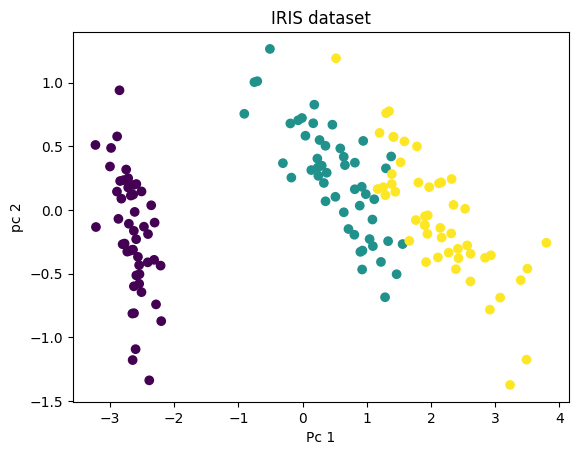

In [ ]:
# myPCA on IRIS

iris = load_iris()

X = iris.data
y = iris.target

reduced_data = myPCA(X, num_components=2)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y)
plt.xlabel('Pc 1')
plt.ylabel('pc 2')
plt.title('IRIS dataset')
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Eigenfaces are a set of eigenvectors obtained from the Principal Component Analysis applied to a collection of face images. They represent the main components that capture the significant variations in the face dataset. Eigenfaces are used for dimensionality reduction and feature extraction in face analysis tasks, such as face recognition. They allow for the representation of face images with lower-dimensional feature vectors derived from the eigenvectors. Eigenfaces have applications in face recognition, face synthesis, and other face-related tasks.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [ ]:
dataset_folder = "D:\\electrical eng\\term 6\\ml\\CHW4_400110009\\CHW4\\Q1\\FacesDataset1\\ORL"

X_train = []
X_test = []
y_train = []
y_test = []

dataset_path = os.path.join('FacesDataset1', 'ORL')

for person_index in range(1, 41):

    person_folder_path =  os.path.join(dataset_path, f's{person_index}')

    train_counter = 0
    test_counter = 0

    image_files = sorted(os.listdir(person_folder_path))

    for img_index in range(1, 11):
        image_path = os.path.join(person_folder_path, f'{img_index}.bmp')
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
                continue


        if train_counter < 5:
            X_train.append(image.flatten())
            y_train.append(person_index)
            train_counter += 1

        else:
            X_test.append(image.flatten())
            y_test.append(person_index)
            test_counter += 1

        if train_counter == 5 and test_counter == 5:
            break

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

`pip install opencv-python`

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

num_components = 45
X_train_pca = myPCA(X_train_flat, num_components)
X_test_pca = myPCA(X_test_flat, num_components)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


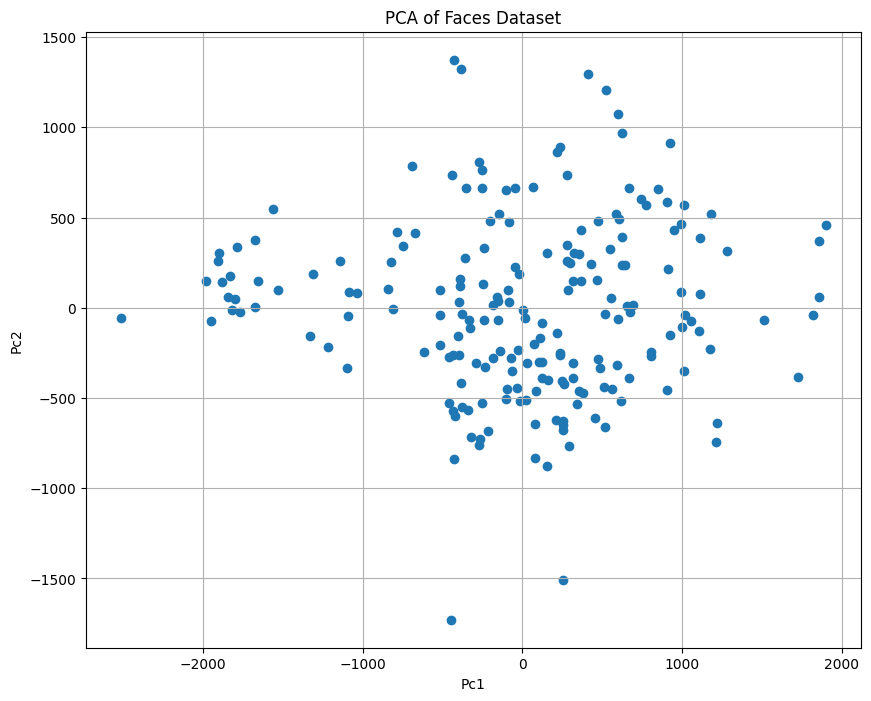

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1])
plt.title('PCA of Faces Dataset')
plt.xlabel('Pc1')
plt.ylabel('Pc2')
plt.grid(True)
plt.show()

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
for person_index in range(1, 41):

    person_folder_path =  os.path.join(dataset_path, f's{person_index}')

    train_counter = 0
    test_counter = 0

    image_files = sorted(os.listdir(person_folder_path))

    for img_index in range(1, 11):
        image_path = os.path.join(person_folder_path, f'{img_index}.bmp')
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
                continue

        X.append(image.flatten())
        y.append(person_index)

X=np.array(X)
y=np.array(y)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
lda = LDA()

X_pca = myPCA(X, num_components)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=42)


# X_train_pca=np.real(X_train_pca)
# X_test_pca=np.real(X_test_pca)

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.67%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [ ]:
accuracy_list = []

for n_components in range(100, 39, -5):

    X_pca = myPCA(X, num_components)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=42)

    lda.fit(X_train ,y_train)

    y_pred = lda.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_list.append(accuracy)

    print("PCA Dimension: {}, Accuracy: {:.2f}%".format(n_components, accuracy * 100))

PCA Dimension: 100, Accuracy: 98.67%
PCA Dimension: 95, Accuracy: 98.67%
PCA Dimension: 90, Accuracy: 98.67%
PCA Dimension: 85, Accuracy: 98.67%
PCA Dimension: 80, Accuracy: 98.67%
PCA Dimension: 75, Accuracy: 98.67%
PCA Dimension: 70, Accuracy: 98.67%
PCA Dimension: 65, Accuracy: 98.67%
PCA Dimension: 60, Accuracy: 98.67%
PCA Dimension: 55, Accuracy: 98.67%
PCA Dimension: 50, Accuracy: 98.67%
PCA Dimension: 45, Accuracy: 98.67%
PCA Dimension: 40, Accuracy: 98.67%
